<h1><center>An Agent-based Economy Model</center></h1>

## Running the Agent-based Model

<span style="color:darkorange">Set the SDK path and maven repository path here.</span>

In [3]:
import json
from IPython.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
with open('notebook_settings.json', 'r') as f:
    notebook_settings = json.load(f)

In [4]:
# Example of sector data
sector_data = {
    'E36': {
         'I': 319, 'N': 1860, 'alpha':0.0988, 'beta': 2.5567, 'kappa': 0.0399, 'delta': 0.0095, 'w': 0.0134,
        'tauY': 0.0071, 'tauK': 0.0266, 'bCF_g': 0, 'bCFH_g': 0, 'bHH_g': 0., 'cG_g': 0, 'cE_g': 0, 'cI_g': 0
    }
}

In [5]:
import os
import pandas as pd
import numpy as np

os.getcwd()

'/Users/perukrishnenvytelingum/GitHub/ClimateRiskABM-V1/Analytics'

In [6]:
from scipy.io import loadmat

sectoral_data = {**loadmat('../data/Austria/parameters_2010Q4.mat'), 
                 **loadmat('../data/Austria/initial_conditions_2010Q4.mat')}
sectoral_data.keys()
sectoral_data['pi0'] = sectoral_data['pi']

In [7]:
np.sum(sectoral_data['alpha_s'][:,0] * np.array([np.max([1, np.ceil(x)]) for x in sectoral_data['N_s'][:,0] / 10000]))

16.19028030455796

In [8]:
sectoral_data['tau_K_s'][0, 0]

-0.26105054841223635

<AxesSubplot:>

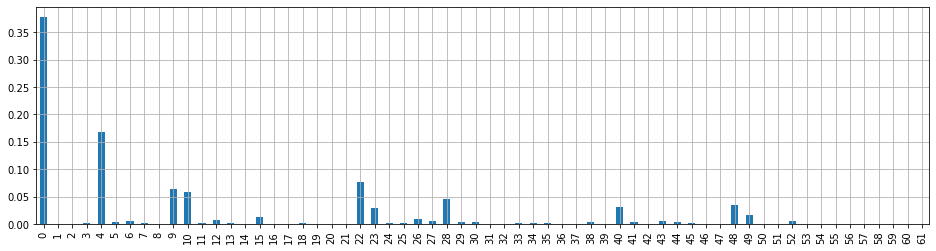

In [11]:
import pandas as pd

pd.Series(sectoral_data['a_sg'][:, 0]).plot.bar(figsize=(16, 4), grid=True)

Text(0.5, 1.0, 'a_sg')

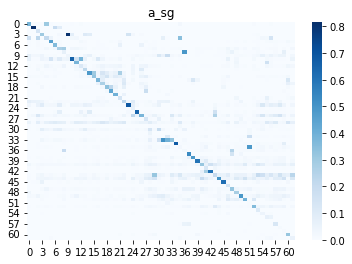

In [37]:
import seaborn as sns

ax = sns.heatmap(pd.DataFrame(sectoral_data['a_sg']), cmap='Blues')
ax.set_title('a_sg')

array([[<AxesSubplot:title={'center':'tau_K'}>]], dtype=object)

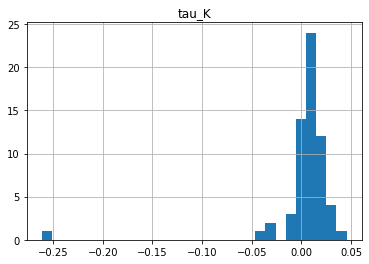

In [26]:
pd.DataFrame(sectoral_data['tau_K_s'], columns=['tau_K']).hist(bins=30)

In [8]:
1 - (1 + sectoral_data['tau_SIF'][0,0]) * sectoral_data['w_s'][0,0] / sectoral_data['alpha_s'][0,0] + sectoral_data['delta_s'][0,0] / sectoral_data['kappa_s'][0,0]

1.2292283169314955

In [9]:
sectoral_data['tau_SIF']

array([[0.21215147]])

<AxesSubplot:title={'center':'Operating margin $\\bar{\\pi}_i$'}>

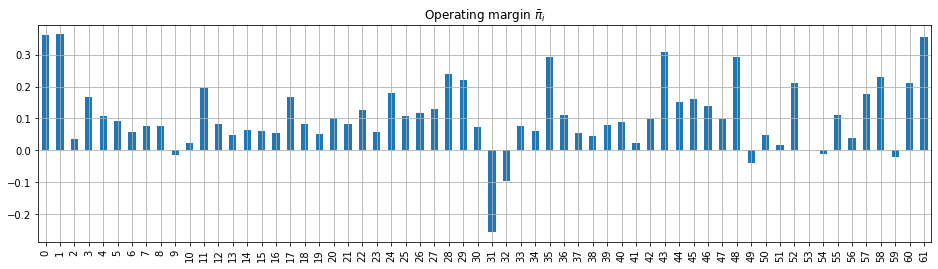

In [10]:
pd.Series({k: 
           1 - (1 + sectoral_data['tau_SIF'][0,0]) * sectoral_data['w_s'][k,0] / sectoral_data['alpha_s'][k,0] \
- sectoral_data['delta_s'][k,0] / sectoral_data['kappa_s'][k,0] \
- 1. / sectoral_data['beta_s'][k,0] \
- sectoral_data['tau_K_s'][k, 0] \
- sectoral_data['tau_Y_s'][k, 0] for k in np.arange(62)}).plot.bar(figsize=(16,4), grid=True, 
                                                                   title=r'Operating margin $\bar{\pi}_i$')

<AxesSubplot:>

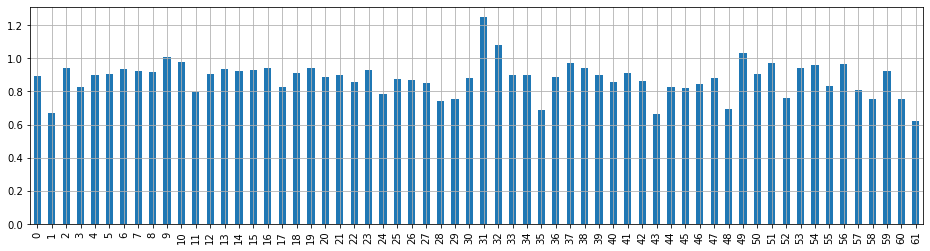

In [11]:
pd.Series({k: (1 + sectoral_data['tau_SIF'][0,0]) * sectoral_data['w_s'][k,0] / sectoral_data['alpha_s'][k,0] \
+ 1 * sectoral_data['delta_s'][k,0] / sectoral_data['kappa_s'][k,0] \
+ 1. / sectoral_data['beta_s'][k,0] for k in np.arange(62)}).plot.bar(figsize=(16,4), grid=True)

In [12]:
print((1 + sectoral_data['tau_SIF'][0,0]) * sectoral_data['w_s'][0,0] / sectoral_data['alpha_s'][0,0],
sectoral_data['delta_s'][0,0] / sectoral_data['kappa_s'][0,0],
1. / sectoral_data['beta_s'][0,0],
sectoral_data['tau_K_s'][0, 0],
sectoral_data['tau_Y_s'][0, 0])

0.030209637249996743 0.2594379541814922 0.6012595718720414 -0.26105054841223635 0.009528627732528832


In [13]:
np.sum(sectoral_data['N_s'][:,0]) / 10000

386.5789

In [14]:
sectoral_data['I_s'][:,0] / 10000

array([4.7901e+00, 1.8670e-01, 2.3400e-02, 4.4800e-02, 4.8420e-01,
       2.2540e-01, 3.8020e-01, 1.0190e-01, 4.6300e-02, 7.0000e-04,
       4.5900e-02, 1.0400e-02, 6.7900e-02, 1.6970e-01, 2.6390e-01,
       2.1270e-01, 4.6100e-02, 8.3800e-02, 1.5190e-01, 3.6500e-02,
       1.1500e-02, 6.1470e-01, 2.2190e-01, 2.9230e-01, 3.1900e-02,
       2.6600e-01, 4.0541e+00, 1.2773e+00, 3.5476e+00, 5.4533e+00,
       1.5527e+00, 1.9400e-02, 3.1500e-02, 1.6810e-01, 6.8100e-02,
       5.8156e+00, 1.6350e-01, 3.7540e-01, 4.0700e-02, 2.0232e+00,
       2.2420e-01, 4.5100e-02, 1.1338e+00, 1.2043e+00, 4.2306e+00,
       2.1944e+00, 2.3510e-01, 1.4055e+00, 1.4077e+00, 3.5780e-01,
       1.4370e-01, 2.6920e-01, 1.4290e+00, 1.0000e+00, 1.2573e+00,
       4.0749e+00, 2.0452e+00, 1.6239e+00, 6.5250e-01, 7.1820e-01,
       1.9790e-01, 1.8762e+00])

In [15]:
np.array([np.max([1, np.ceil(x)]) for x in sectoral_data['N_s'][:,0] / 10000])

array([13.,  2.,  1.,  1.,  8.,  3.,  4.,  2.,  2.,  1.,  2.,  2.,  3.,
        4.,  4.,  7.,  3.,  5.,  7.,  3.,  1.,  5.,  3.,  3.,  1.,  2.,
       29.,  8., 22., 37., 14.,  1.,  1.,  6.,  3., 30.,  2.,  2.,  2.,
        7.,  9.,  4.,  3.,  3., 13.,  7.,  2.,  4.,  3.,  2.,  9.,  2.,
       12., 26., 12., 17., 14.,  4.,  3.,  6.,  1.,  7.])

In [16]:
np.sum(np.array([np.max([1, np.ceil(x)]) for x in sectoral_data['N_s'][:,0] / 10000]))

419.0

In [17]:
sectoral_data['kappa_s']

array([[0.04445415],
       [0.20714131],
       [0.03388643],
       [0.19295068],
       [0.50360666],
       [0.37806395],
       [0.44099715],
       [0.41542187],
       [0.32413978],
       [0.83487609],
       [0.80210979],
       [0.21804341],
       [0.43596542],
       [0.26435987],
       [0.53460706],
       [0.40470532],
       [0.19218582],
       [0.35625172],
       [0.5705239 ],
       [0.4100894 ],
       [0.96308879],
       [0.48439766],
       [1.9880706 ],
       [0.25044874],
       [0.04038561],
       [0.07058235],
       [0.41214297],
       [0.44181742],
       [0.46380423],
       [0.35707689],
       [0.16091339],
       [0.16695676],
       [0.42900067],
       [0.0472769 ],
       [1.0300592 ],
       [0.26570008],
       [1.59745491],
       [0.55327428],
       [0.13926299],
       [1.11606165],
       [0.28609093],
       [0.5365031 ],
       [2.21662564],
       [0.08174615],
       [0.99064307],
       [0.44257637],
       [1.49076183],
       [1.515

In [18]:
sectoral_data['Y'][-1] / 1000

array([140.15972179])

In [19]:
np.savetxt('../data/Austria/Y.csv', sectoral_data['Y_I'][:, 0], delimiter=',', newline=',')

In [20]:
np.savetxt('../data/Austria/pi.csv', sectoral_data['pi'][:,0], delimiter=",", newline=',')

In [22]:
loadmat('../data/Austria/initial_conditions_2010Q4.mat')['pi_EA']

array([[0.00225074]])

In [23]:
loadmat('../data/Austria/model_output_2010Q4-2013Q4.mat').keys()

dict_keys(['__header__', '__version__', '__globals__', 'compensation_employees', 'euribor', 'gdp_deflator_growth_ea', 'nominal_capitalformation', 'nominal_exports', 'nominal_fixed_capitalformation', 'nominal_fixed_capitalformation_dwellings', 'nominal_gdp', 'nominal_government_consumption', 'nominal_gva', 'nominal_household_consumption', 'nominal_imports', 'nominal_sector_gva', 'operating_surplus', 'real_capitalformation', 'real_exports', 'real_fixed_capitalformation', 'real_fixed_capitalformation_dwellings', 'real_gdp', 'real_gdp_ea', 'real_government_consumption', 'real_gva', 'real_household_consumption', 'real_imports', 'real_sector_gva', 'taxes_production', 'wages'])

<AxesSubplot:>

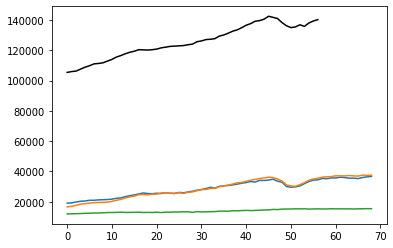

In [24]:
df0 = {k: pd.DataFrame(sectoral_data[k])[0] for k in ['Y', 'Y_I', 'pi', 'C_E', 'C_G']}
df0['Y_I'].plot()
df0['Y'].plot(color='k')
df0['C_E'].plot()
df0['C_G'].plot()

In [25]:
df0['Y_I']

0     19098.079021
1     19232.592591
2     19827.983634
3     20341.261595
4     20513.271890
          ...     
64    35567.305338
65    35271.033743
66    36006.539133
67    36429.540167
68    36723.913194
Name: 0, Length: 69, dtype: float64

<AxesSubplot:>

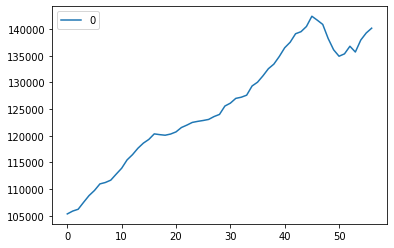

In [26]:
pd.DataFrame(sectoral_data['Y']).plot()

<AxesSubplot:>

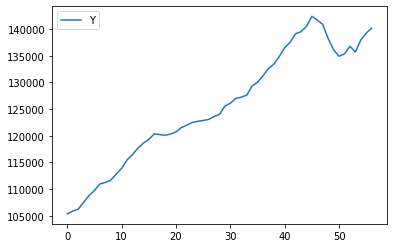

In [27]:
pd.concat({'Y': pd.DataFrame(sectoral_data['Y'])[0]}, axis=1).plot()

In [28]:
a_sg = pd.DataFrame(sectoral_data['a_sg'])
a_sg.replace(0, np.nan).sum(axis=1)

0     0.749141
1     1.106894
2     0.149373
3     1.632521
4     1.344122
        ...   
57    0.259156
58    0.022934
59    0.073182
60    0.444135
61    0.136753
Length: 62, dtype: float64

In [29]:
a_sg.loc[57].replace(0, np.nan).dropna()

28    0.003140
30    0.000001
35    0.005216
36    0.052381
37    0.060406
38    0.001666
47    0.001447
51    0.004742
57    0.128476
58    0.001680
Name: 57, dtype: float64

In [30]:
_params = pd.concat({'params': pd.Series({k: sectoral_data[k][0, 0] for k in [
    'G', 'J', 'L', 'S', 'T', 'T_prime', 'Y_EA', 'H_act', 'H_inact',
                               'omega', 'pi_EA', 'r_bar', 'sb_inact', 'sb_other', 'w_UB', 
                               'alpha_E', 'alpha_G', 'alpha_I', 'alpha_Y_EA', 'alpha_pi_EA', 
                               'beta_E', 'beta_G', 'beta_I', 'beta_Y_EA', 'beta_pi_EA', 
                               'mu', 'pi_star', 'psi', 'psi_H', 'r_G', 'r_star', 'rho', 
                               'tau_CF', 'tau_EXPORT', 'tau_FIRM', 'tau_G', 
                               'tau_INC', 'tau_SIF', 'tau_SIW', 'tau_VAT', 
                               'theta', 'theta_DIV', 'theta_UB', 'xi_gamma', 'xi_pi', 'zeta', 'zeta_LTV', 
                               'zeta_b', 'D_H', 'D_I', 'D_RoW', 'E_CB', 'E_k', 'K_H', 'L_G', 'L_I', 
                               'Y_EA', 'omega', 'pi_EA', 'r_bar', 'sb_inact', 'sb_other', 'w_UB']})}, axis=1)
_params.loc['pi'] = sectoral_data['pi'][-1, 0]
_params['params'].to_json('../data/Austria/params.json')

In [31]:
_params.loc['r_bar']

params    0.00254
Name: r_bar, dtype: float64

In [32]:
a_sg.T.to_csv('../data/Austria/a_sg.csv', header=None, index=None)

In [33]:
import pandas as pd
import numpy as np

df = pd.concat({k: pd.Series(sectoral_data[k][:, 0]) for k in 
                ['I_s', 'N_s', 'alpha_s', 'beta_s', 'kappa_s', 'delta_s', 'w_s',
                 'tau_K_s', 'tau_Y_s',
                 'b_CFH_g', 'b_CF_g', 'b_HH_g', 
                 'c_E_g', 'c_G_g', 'c_I_g']}, axis=1)
df.index = np.arange(1, sectoral_data['G'][0, 0] + 1)
df.to_csv('../data/Austria/sector_params.csv', index=None)

In [34]:
df['N_s'].sum()

3865789

In [35]:
pd.read_csv('../data/Austria/sector_params.csv')

,I_s,N_s,alpha_s,beta_s,kappa_s,delta_s,w_s,tau_K_s,tau_Y_s,b_CFH_g,b_CF_g,b_HH_g,c_E_g,c_G_g,c_I_g
0,47901,123068,0.011260,1.663175,0.044454,0.011533,0.000281,-0.261051,0.009529,0.000609,0.003348,0.011288,0.005090,0.000000,0.016811
1,1867,18107,0.031027,1.950733,0.207141,0.013211,0.002338,-0.039817,0.008845,0.000000,0.000000,0.002004,0.000593,0.000000,0.004087
2,234,283,0.038361,1.527748,0.033886,0.007643,0.001871,0.003561,0.023029,0.000000,0.000000,0.000333,0.000018,0.000000,0.000369
3,448,6395,0.070938,1.824438,0.192951,0.028235,0.007750,-0.007323,0.012414,0.004372,0.000805,0.000344,0.007268,0.000000,0.058184
4,4842,79431,0.053336,1.394632,0.503607,0.025325,0.005887,-0.011240,0.002044,0.000000,0.000000,0.063051,0.054344,0.000009,0.048951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,16239,35610,0.023112,3.451218,0.237618,0.023917,0.007965,-0.006254,0.021076,0.000000,0.002292,0.013342,0.001303,0.012943,0.001307
58,6525,22679,0.019183,2.780133,0.067018,0.008958,0.004095,0.002245,0.016505,0.000000,0.000000,0.009686,0.000055,0.004668,0.000064
59,7182,57121,0.014173,2.660545,0.152730,0.008852,0.005735,0.031566,0.065921,0.000000,0.000000,0.011051,0.000000,0.021757,0.000000
60,1979,4947,0.051506,2.375529,2.354810,0.138940,0.011673,0.014930,0.019320,0.000000,0.000000,0.002121,0.000013,0.000000,0.000035


In [36]:
sectoral_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Apr 25 10:05:19 2021',
 '__version__': '1.0',
 '__globals__': [],
 'G': array([[62]], dtype=uint8),
 'H_act': array([[4729215]], dtype=int32),
 'H_inact': array([[4130385]], dtype=int32),
 'I_s': array([[47901],
        [ 1867],
        [  234],
        [  448],
        [ 4842],
        [ 2254],
        [ 3802],
        [ 1019],
        [  463],
        [    7],
        [  459],
        [  104],
        [  679],
        [ 1697],
        [ 2639],
        [ 2127],
        [  461],
        [  838],
        [ 1519],
        [  365],
        [  115],
        [ 6147],
        [ 2219],
        [ 2923],
        [  319],
        [ 2660],
        [40541],
        [12773],
        [35476],
        [54533],
        [15527],
        [  194],
        [  315],
        [ 1681],
        [  681],
        [58156],
        [ 1635],
        [ 3754],
        [  407],
        [20232],
        [ 2242],
        [  451],
        [11338],
  

In [41]:
import os

from utils import *

seed = 123
level = 'WARN'
params = {
    'vm': {'seed': seed, 'runs': 1, 'ticks': 6, 
           'level': level, 'levelHH': level, 'levelFirm': level, 'levelEconomy': level},
    'config': {'simudyne.core.export-path': 'Output_{0}'.format(seed)},
    'input': {'G': 2, 'I': 100, 'H': 1000, 'alpha': .0055, 'w': .2, 'kappa': .03, 'delta': 0.01,
              'wh0': 40., 'C_h_d0': 10.0, 'beta': 2.5, 'bCF_g': 0.0, 'bCFH_g': 0.0, 'bHH_g': 0.0092, 
              'cG_g': 0, 'cE_g': 0, 'cI_g': 0, 'a_s_g': .3, 'pi': .01, 'K0': 100},
    'notebook_settings' : notebook_settings
}

In [42]:
%%time

res, run_ids, dataset_ = run_sdk(params, notebook_settings['maven_repo'], verbose=5, 
                                 simudyne_version='2.5.1-preview', java_cmd=notebook_settings['java_cmd'])

KeyboardInterrupt: 

In [43]:
print('Run ids: {0}.'.format(', '.join(run_ids)))

NameError: name 'run_ids' is not defined

In [ ]:
print('Dataset: {0}.'.format(', '.join(list(dataset_))))

In [ ]:
run_id = run_ids[0]

In [ ]:
sdk_params = get_agent_data(res, run_id, 'Simulation').iloc[[0], 3:]
sdk_params.loc[:, ~sdk_params.columns.str.contains("system__")].iloc[[0], 5:].T

In [ ]:
firm_data = get_agent_data(res, run_id, 'Firm')
firm_data.astype(float).iloc[:, :-8]

In [ ]:
economy_data = get_agent_data(res, run_id, 'Economy')
economy_data.astype(float)

In [ ]:
household_data = get_agent_data(res, run_id, 'Household')
household_data.iloc[:, :]

In [ ]:
plot_dict({'Economy {0}'.format(r'$\bar{P}(t)$'): get_variable(res, run_id, 'Economy', 'PBar'), 
           'Economy {0}'.format(r'$Y(t)$'): get_variable(res, run_id, 'Economy', 'Y'), 
           'Economy {0}'.format(r'$Y^e(t)$'): get_variable(res, run_id, 'Economy', 'Ye'), 
           'Economy {0}'.format(r'$\gamma^e(t)$'): get_variable(res, run_id, 'Economy', 'gamma_e')}, 
          figsize=(20, 5))

In [ ]:
plot_dict({'Firm {0}'.format(r'$S_i(t)$'): get_variable(res, run_id, 'Firm', 'S').round(6),
           'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'),
           'Firm {0}'.format(r'$N^d_i(t)$'): get_variable(res, run_id, 'Firm', 'Nd'),
           'Firm {0}'.format(r'$N_i(t)$'): get_variable(res, run_id, 'Firm', 'N')}, 
          figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Economy {0}'.format(r'$\pi(t)$'): get_variable(res, run_id, 'Economy', 'pi'), 
           'Economy {0}'.format(r'$\pi^e(t)$'): get_variable(res, run_id, 'Economy', 'piExpected'), 
           'Economy {0}'.format(r'$\gamma^e(t)$'): get_variable(res, run_id, 'Economy', 'gamma_e')}, 
          figsize=(16, 5))

In [ ]:
plot_dict({'Firm {0}'.format(r'$\alpha_i(t)$'): get_variable(res, run_id, 'Firm', 'alpha'),
           'Firm {0}'.format(r'$M_i(t)$'): get_variable(res, run_id, 'Firm', 'M'),
           'Firm {0}'.format(r'$K_i(t)$'): get_variable(res, run_id, 'Firm', 'K'),
           'Firm {0}'.format(r'$N_i(t)$'): get_variable(res, run_id, 'Firm', 'N')}, 
          figsize=(20, 5), legend=True)

In [ ]:
beta = res['run000000000']['Simulation']['beta'][0]
kappa = res['run000000000']['Simulation']['kappa'][0]
alpha = res['run000000000']['Simulation']['alpha'][0]

plot_dict({'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'),
           'Firm {0}'.format(r'$\beta_i M_i(t-1)$'): beta * get_variable(res, run_id, 'Firm', 'M'),
           'Firm {0}'.format(r'$\kappa_i K_i(t-1)$'): kappa * get_variable(res, run_id, 'Firm', 'K'), 
           'Firm {0}'.format(r'$\alpha_i(t) N_i(t)$'): 
           get_variable(res, run_id, 'Firm', 'alpha') * get_variable(res, run_id, 'Firm', 'N')}, 
          figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$\beta_i M_i(t-1)$'): beta * get_variable(res, run_id, 'Firm', 'M').shift(1),
           'Firm {0}'.format(r'$1.5  \bar{\alpha_i} N_i(t)$'): 1.5 * alpha * get_variable(res, run_id, 'Firm', 'N'),
           'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'), 
           'Firm {0}'.format(r'$\kappa_i K_i(t-1)$'): kappa * get_variable(res, run_id, 'Firm', 'K').shift(1), 
           'Firm {0}'.format(r'$Y_i(t)$'): get_variable(res, run_id, 'Firm', 'Y')}, 
          figsize=(20, 5), legend=True)

In [ ]:
nbEmployed = (household_data.reset_index().pivot(index='time', values='EmploymentStatus', columns='_id') 
 == 'Employed_New').sum(axis=1)
nbActive = (household_data.reset_index().pivot(index='time', values='activityStatus', columns='_id') 
 == 'Active').sum(axis=1)
employmentRate = pd.concat({'EmploymentRate': 100 * nbEmployed / nbActive}, axis=1)

plot_dict({'Firm {0}'.format(r'$w_i(t)$'): get_variable(res, run_id, 'Firm', 'w').shift(-1), 
           'Household {0}'.format(r'$w_h(t)$'): get_variable(res, run_id, 'Household', 'w_h'), 
           'Household {0}'.format(r'$Y_h^e(t)$'): get_variable(res, run_id, 'Household', 'Y_h_e'), 
           '% Employed Household': employmentRate}, figsize=(20, 5))

In [ ]:
plot_dict({'Firm {0}'.format(r'$\alpha_i(t)$'): get_variable(res, run_id, 'Firm', 'alpha'), 
           'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'), 
           'Firm {0}'.format(r'$M_i(t)$'): get_variable(res, run_id, 'Firm', 'M'), 
           'Firm {0}'.format(r'$K_i(t)$'): get_variable(res, run_id, 'Firm', 'K')}, 
          figsize=(20, 5))

In [ ]:
plot_dict({'Household {0}'.format(r'$sb^{other}(t)$'): get_variable(res, run_id, 'Household', 'sb_other'),
           'Household {0}'.format(r'$w_h(t)$'): get_variable(res, run_id, 'Household', 'w_h'), 
           'Household {0}'.format(r'$Y_h^e(t)$'): get_variable(res, run_id, 'Household', 'Y_h_e'),
           'Household {0}'.format(r'$C^d_h(t)$'): get_variable(res, run_id, 'Household', 'C_h_d')}, 
          figsize=(20, 5))

In [ ]:
plot_dict({'Firm {0}'.format(r'$Q^d_i(t)$'): get_variable(res, run_id, 'Firm', 'Qd'), 
           'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'), 
           'Good {1}, {0}'.format(r'$\Delta M_g(t)$', 2): 
           get_variable(res, run_id, 'Firm', 'dMd_g_2'), 
           'Firm {0}'.format(r'$Q^{d,M}_i(t)$'): get_variable(res, run_id, 'Firm', 'QdM')}, 
          figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$Q^d_i(t)$'): get_variable(res, run_id, 'Firm', 'Qd'), 
           'Firm {0}'.format(r'$Q^{d,I}_i(t)$'): get_variable(res, run_id, 'Firm', 'QdI'), 
           'Firm {0}'.format(r'$Q^{d,C}_i(t)$'): get_variable(res, run_id, 'Firm', 'QdC'), 
           'Firm {0}'.format(r'$Q^{d,M}_i(t)$'): get_variable(res, run_id, 'Firm', 'QdM')}, 
          figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$Q^{d,I,F}_{i}(t)$'): get_variable(res, run_id, 'Firm', 'QdI_F'), 
           'Firm {0}'.format(r'$Q^{d,C,F}_{i}(t)$'): get_variable(res, run_id, 'Firm', 'QdC_F'), 
           'Firm {0}'.format(r'$Q^{d,M,F}_{i}(t)$'): get_variable(res, run_id, 'Firm', 'QdM_F')}, 
          figsize=(16, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$Q^{d,I,HH}_{i}(t)$'): get_variable(res, run_id, 'Firm', 'QdI_HH'), 
           'Firm {0}'.format(r'$Q^{d,C,HH}_{i}(t)$'): get_variable(res, run_id, 'Firm', 'QdC_HH'), 
           'Firm {0}'.format(r'$Q^{d,M,HH}_{i}(t)$'): get_variable(res, run_id, 'Firm', 'QdM_HH')}, 
          figsize=(16, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$K_i(t)$'): get_variable(res, run_id, 'Firm', 'K'), 
           'Firm {0}'.format(r'$\kappa_i I_i(t)$'): kappa * get_variable(res, run_id, 'Firm', 'I'), 
           'Firm {0}'.format(r'$Q^d_i(t)$'): get_variable(res, run_id, 'Firm', 'Qd'), 
           'Firm {0}'.format(r'$\kappa_i I^d_i(t)$'): kappa * get_variable(res, run_id, 'Firm', 'Id')}, 
          figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'), 
           'Firm {0}'.format(r'$Y_i(t)$'): get_variable(res, run_id, 'Firm', 'Y'), 
           'Firm {0}'.format(r'$Q_i(t)$'): get_variable(res, run_id, 'Firm', 'Q')}, 
          figsize=(16, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$P_i(t)$'): get_variable(res, run_id, 'Firm', 'P'), 
           'Firm {0}'.format(r'$Q_i(t)$'): get_variable(res, run_id, 'Firm', 'Q'),
           'Firm {0}'.format(r'$Q^d_i(t)$'): get_variable(res, run_id, 'Firm', 'Qd'), 
           'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs')}, 
          figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$E_i(t)$'): get_variable(res, run_id, 'Firm', 'E'),
           'Firm {0}'.format(r'$D_i(t)$'): get_variable(res, run_id, 'Firm', 'D'),
           'Firm {0}'.format(r'$\Delta D^e_i(t)$'): get_variable(res, run_id, 'Firm', 'DeltaD_e'),
           'Firm {0}'.format(r'$\Delta L^d_i(t)$'): get_variable(res, run_id, 'Firm', 'DeltaL_d')}, 
          figsize=(20, 5), legend=True)

In [ ]:
M_g = {}
_nbFirms = min([2, params['input']['I']])
for k in np.arange(1, _nbFirms + 1):
    G = res[run_id]['Firm'].set_index('time')
    G = G[G['_id'] == k]
    _k = 'Firm {1}, {0}'.format(r'$M_g(t)$'.format(k), k)
    M_g[_k] = G[[i for i in G.columns if i[:3] == 'M_g']]
    
    G = res[run_id]['Firm']
    G = G[G['_id'] == k].set_index('time')
    _k = 'Firm {1}, {0}'.format(r'$\Delta M^d_g(t)$'.format(k), k)
    M_g[_k] = G[[i for i in G.columns if i[:5] == 'dMd_g']]

plot_dict(M_g, figsize=(20, 5), legend=True)

In [ ]:
plot_dict({'Firm {0}'.format(r'$Q^s_i(t)$'): get_variable(res, run_id, 'Firm', 'Qs'), 
           'Firm {0}'.format(r'$K_i(t)$'): get_variable(res, run_id, 'Firm', 'K'),
           'Firm {0}'.format(r'$I_i(t)$'): get_variable(res, run_id, 'Firm', 'I')}, 
          figsize=(16, 5), legend=True)

In [ ]:
G = res[run_id]['Economy'].set_index('time')
PBar_g = G[[i for i in G.columns if 'PBar_g' in i]]

plot_dict({'Economy {0}'.format(r'$\bar{P}_{g}(t)$'): PBar_g, 
           'Economy {0}'.format(r'$\bar{P}^{HH}(t)$'): get_variable(res, run_id, 'Economy', 'PBarHH'), 
           'Economy {0}'.format(r'$\bar{P}^{CF}(t)$'): get_variable(res, run_id, 'Economy', 'pi')}, 
          figsize=(16, 5), legend=True)

In [ ]:
firm_data[firm_data['g'] == 1].reset_index().pivot(index='time', values='QdM', columns='_id').sum(axis=1).plot()
firm_data[firm_data['g'] == 2].reset_index().pivot(index='time', values='QdM', columns='_id').sum(axis=1).plot()